In [5]:
from table_evaluator import TableEvaluator
import mlflow
import pandas as pd
import warnings

In [26]:
variables = ['sex','age','agegr','placesize','edu','socprof','marital','ls','depress','trust','trustfam','trustneigh','sport','nofriend','smoke','alcabuse','alcsol','wkabint','englang','height','weight','bmi']
num = ['age', 'depress', 'nofriend', 'height', 'weight', 'bmi']
fac = ['sex','agegr','placesize','edu','socprof','marital','ls','trust','trustfam','trustneigh','sport','smoke','alcabuse','alcsol','wkabint','englang']

In [58]:
original = pd.read_csv("df_original.csv", names = variables)
ctgan = pd.read_csv('ctgan_best.csv', names = variables, header = 0)
cart = pd.read_csv("df1_cart.csv", names = variables)
ctree = pd.read_csv("df1_ctree.csv", names = variables)
parametric = pd.read_csv("df1_parametric.csv", names = variables)
rf = pd.read_csv("df1_rf.csv", names = variables)
bag = pd.read_csv("df1_bag.csv", names = variables)
sample = pd.read_csv("df1_sample.csv", names = variables)
tvae = pd.read_csv("tvae_best.csv", names = variables, header = 0)

In [62]:
evaluator_cart = TableEvaluator(original, cart, cat_cols = fac)
evaluator_ctree = TableEvaluator(original, ctree, cat_cols = fac)
evaluator_parametric = TableEvaluator(original, parametric, cat_cols = fac)
evaluator_rf = TableEvaluator(original, rf, cat_cols = fac)
evaluator_bag = TableEvaluator(original, bag, cat_cols = fac)
evaluator_sample = TableEvaluator(original, sample, cat_cols = fac)
evaluator_ctgan = TableEvaluator(original, ctgan, cat_cols = fac)
evaluator_tvae = TableEvaluator(original, tvae, cat_cols = fac)

## CTGAN

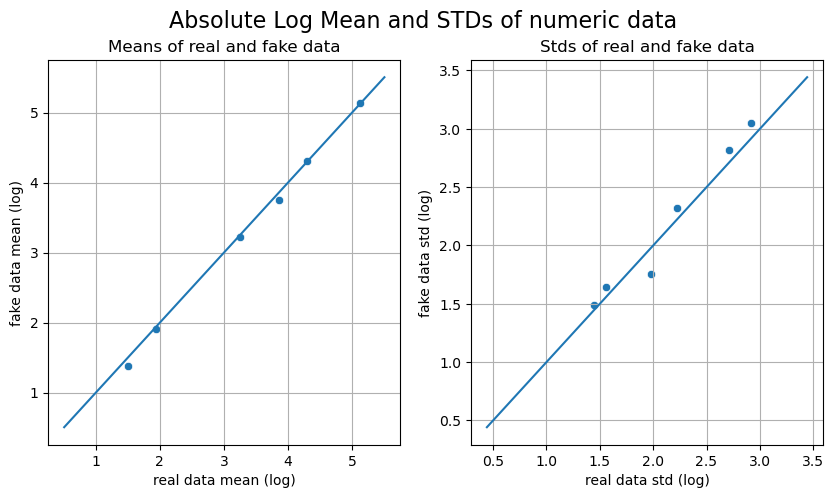

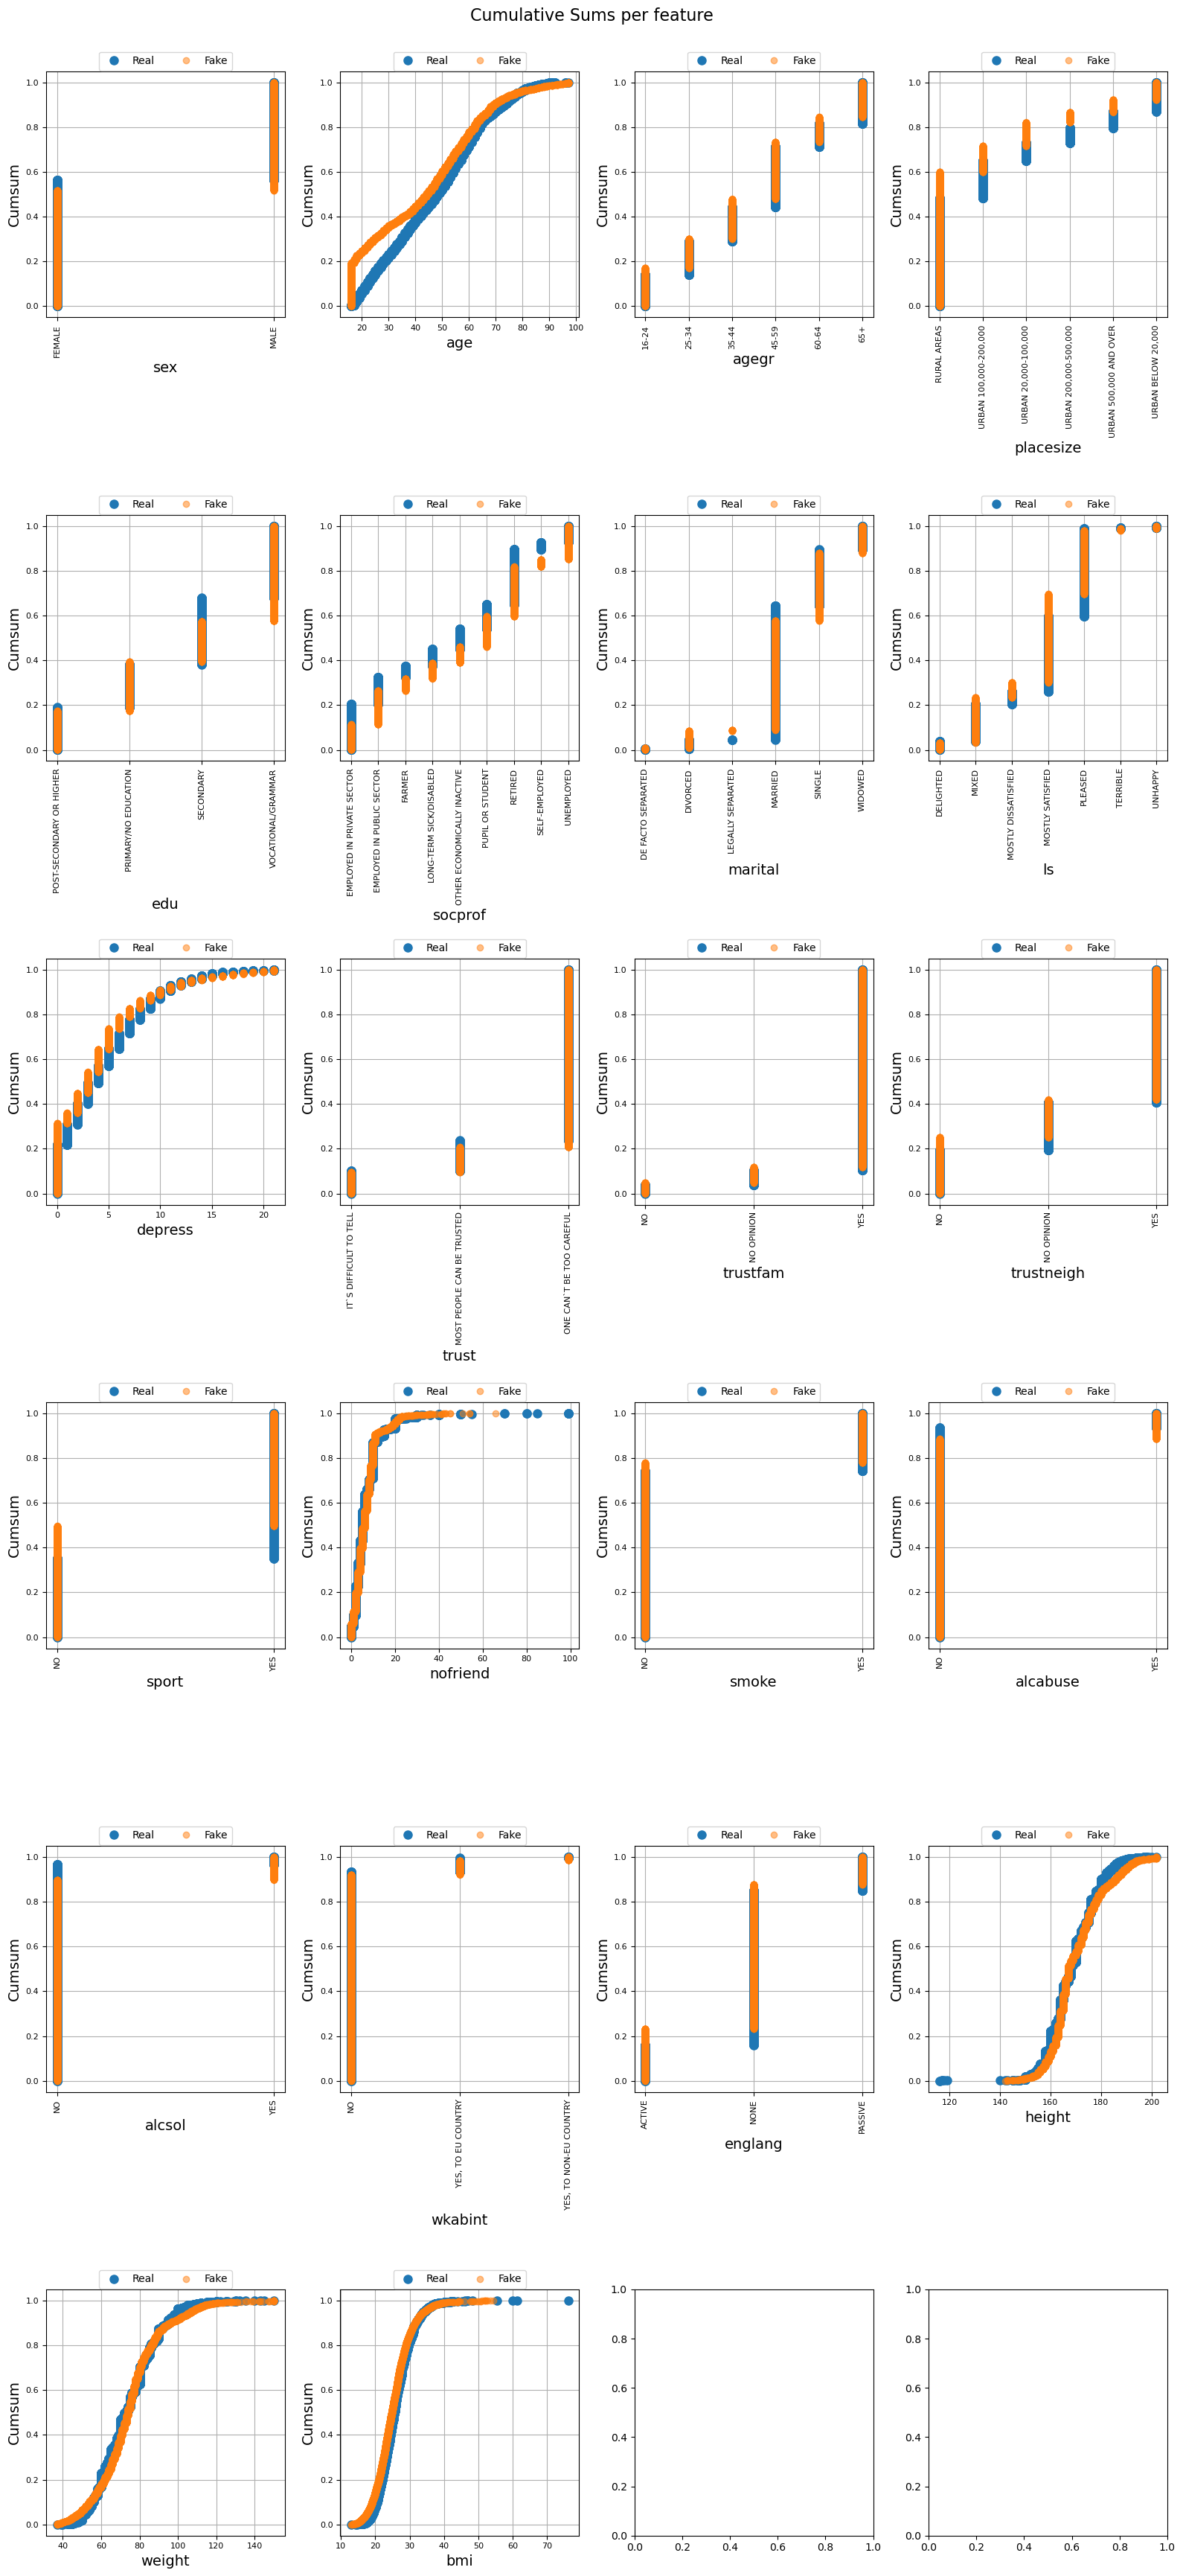

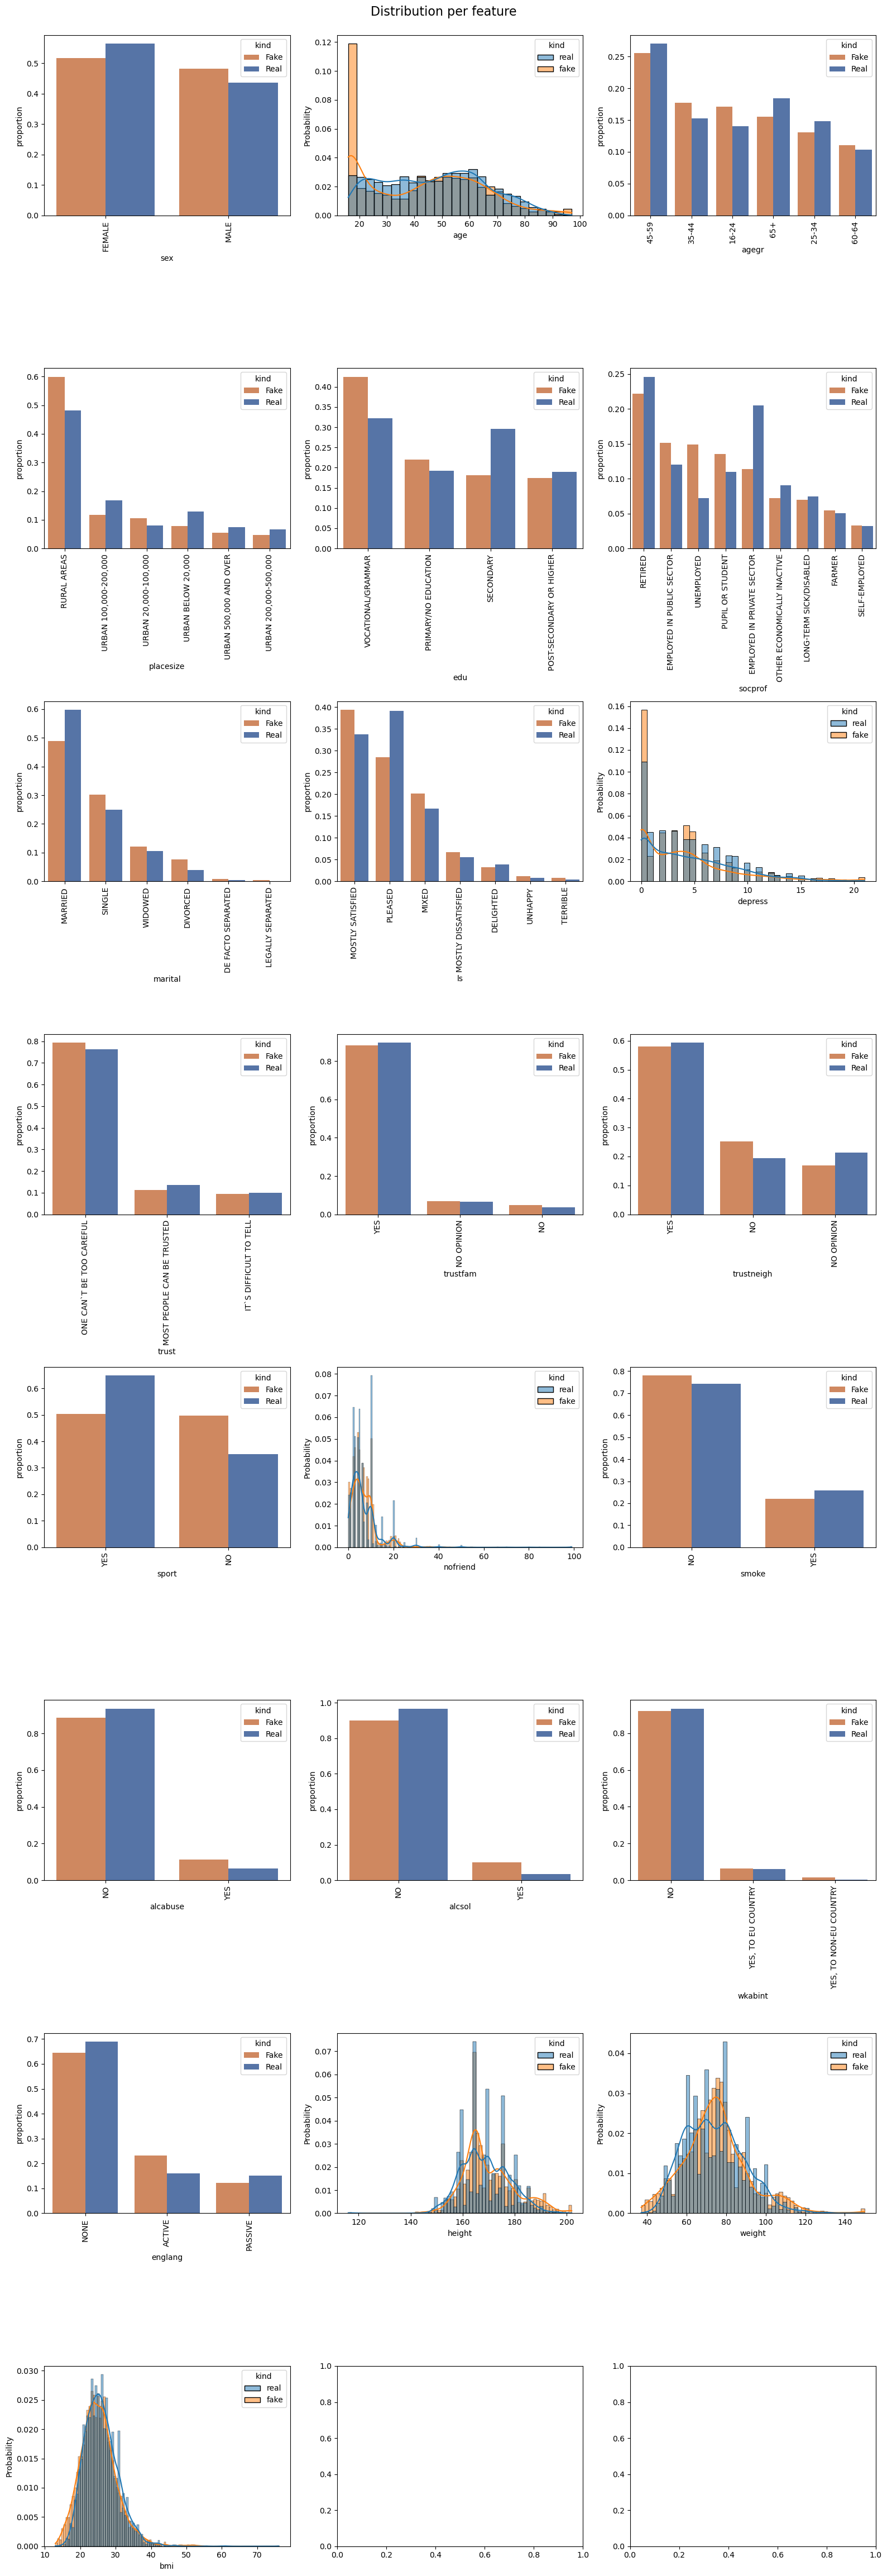

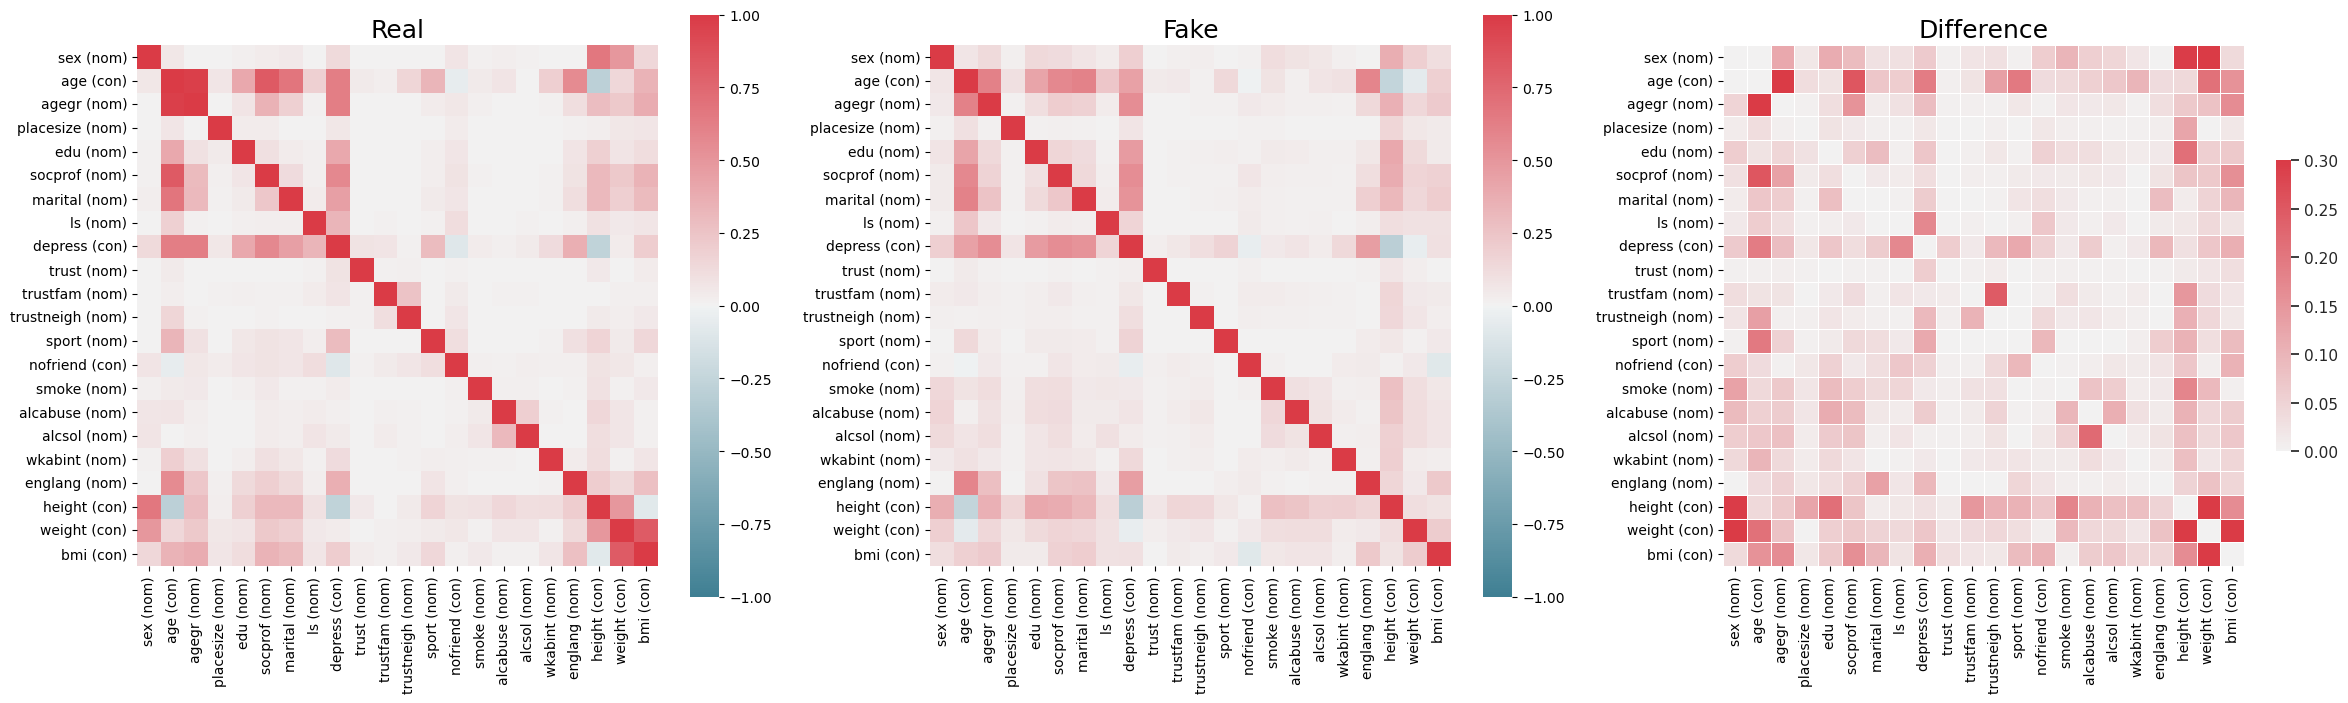

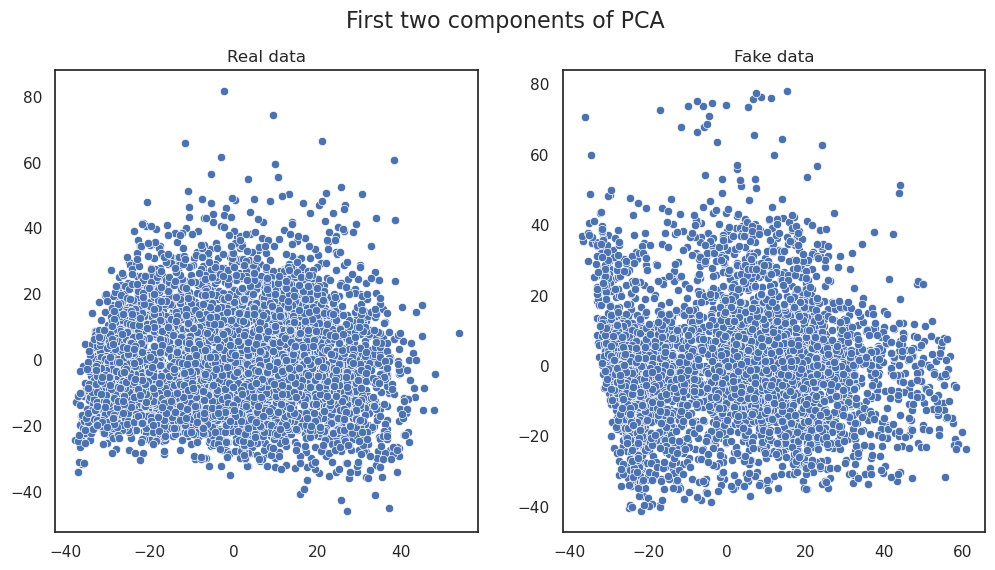

In [39]:
warnings.filterwarnings("ignore")

#evaluator_cart.visual_evaluation()
#evaluator_ctree.visual_evaluation()
#evaluator_parametric.visual_evaluation()
#evaluator_rf.visual_evaluation()
#evaluator_bag.visual_evaluation()
#evaluator_sample.visual_evaluation()
evaluator_ctgan.visual_evaluation()
#evaluator_tvae.visual_evaluation()

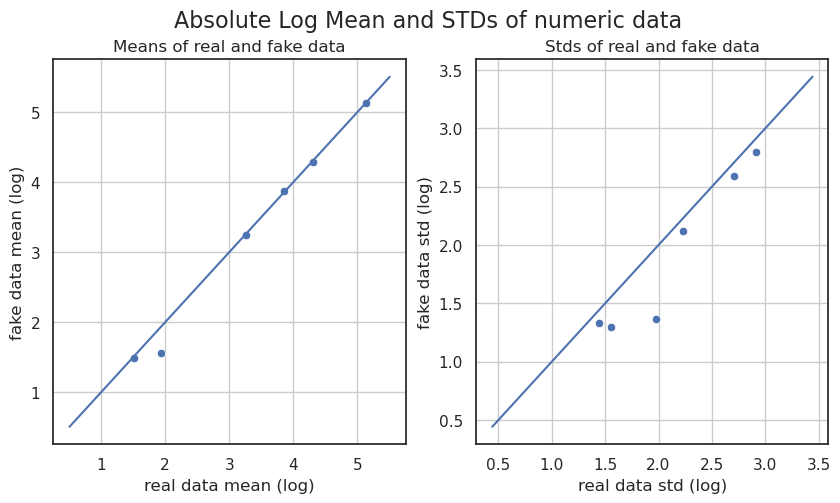

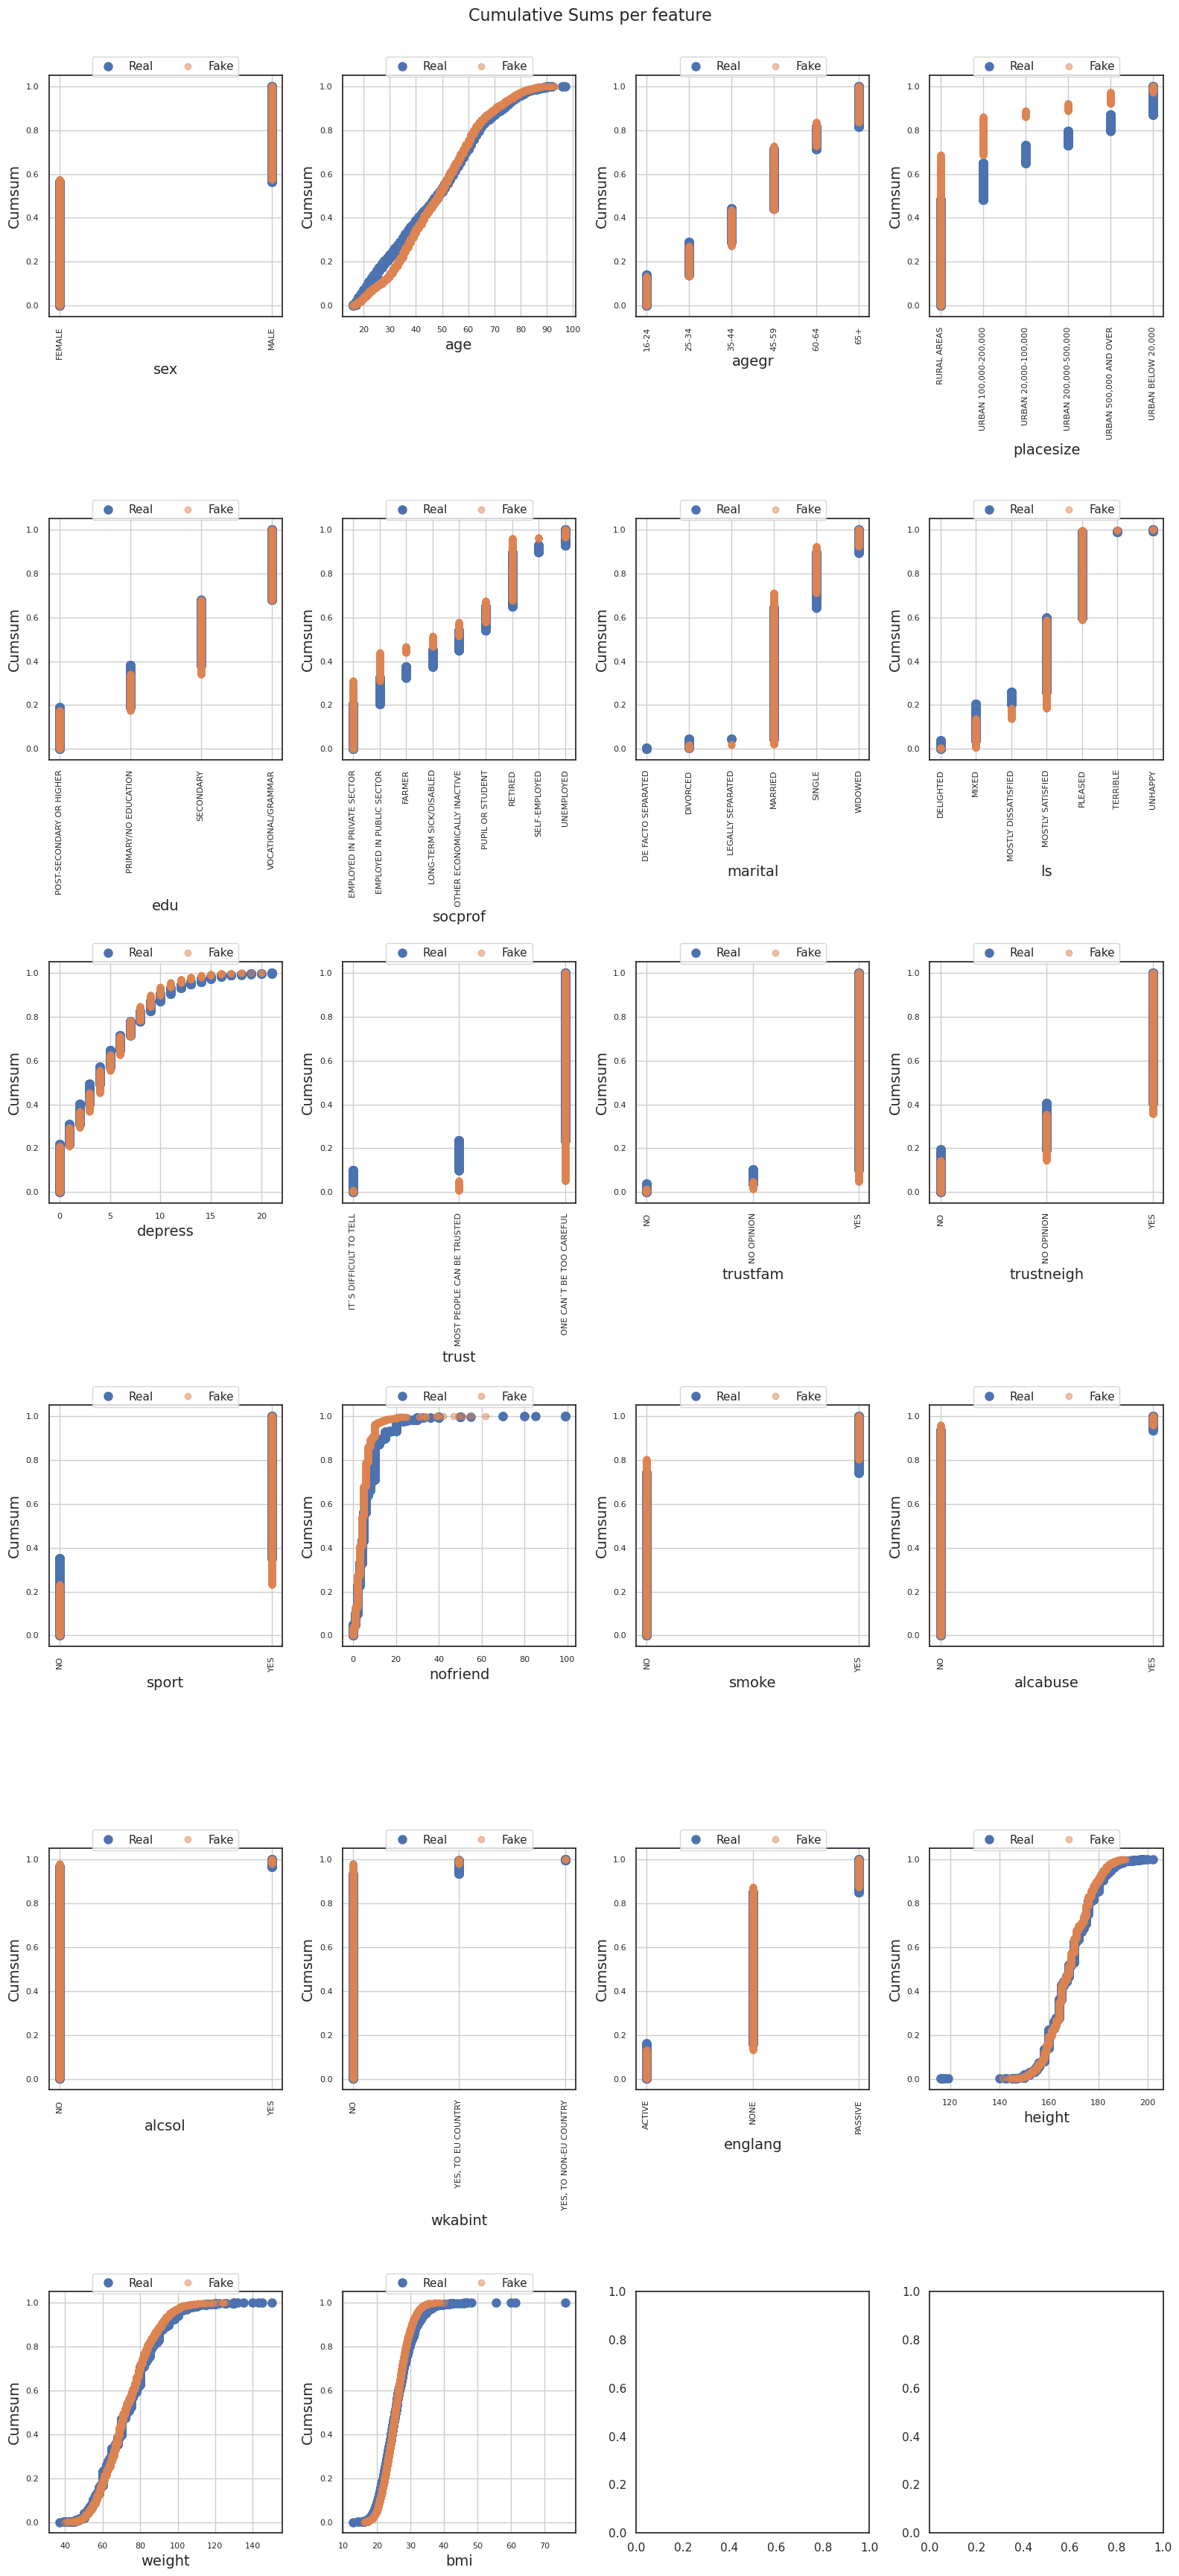

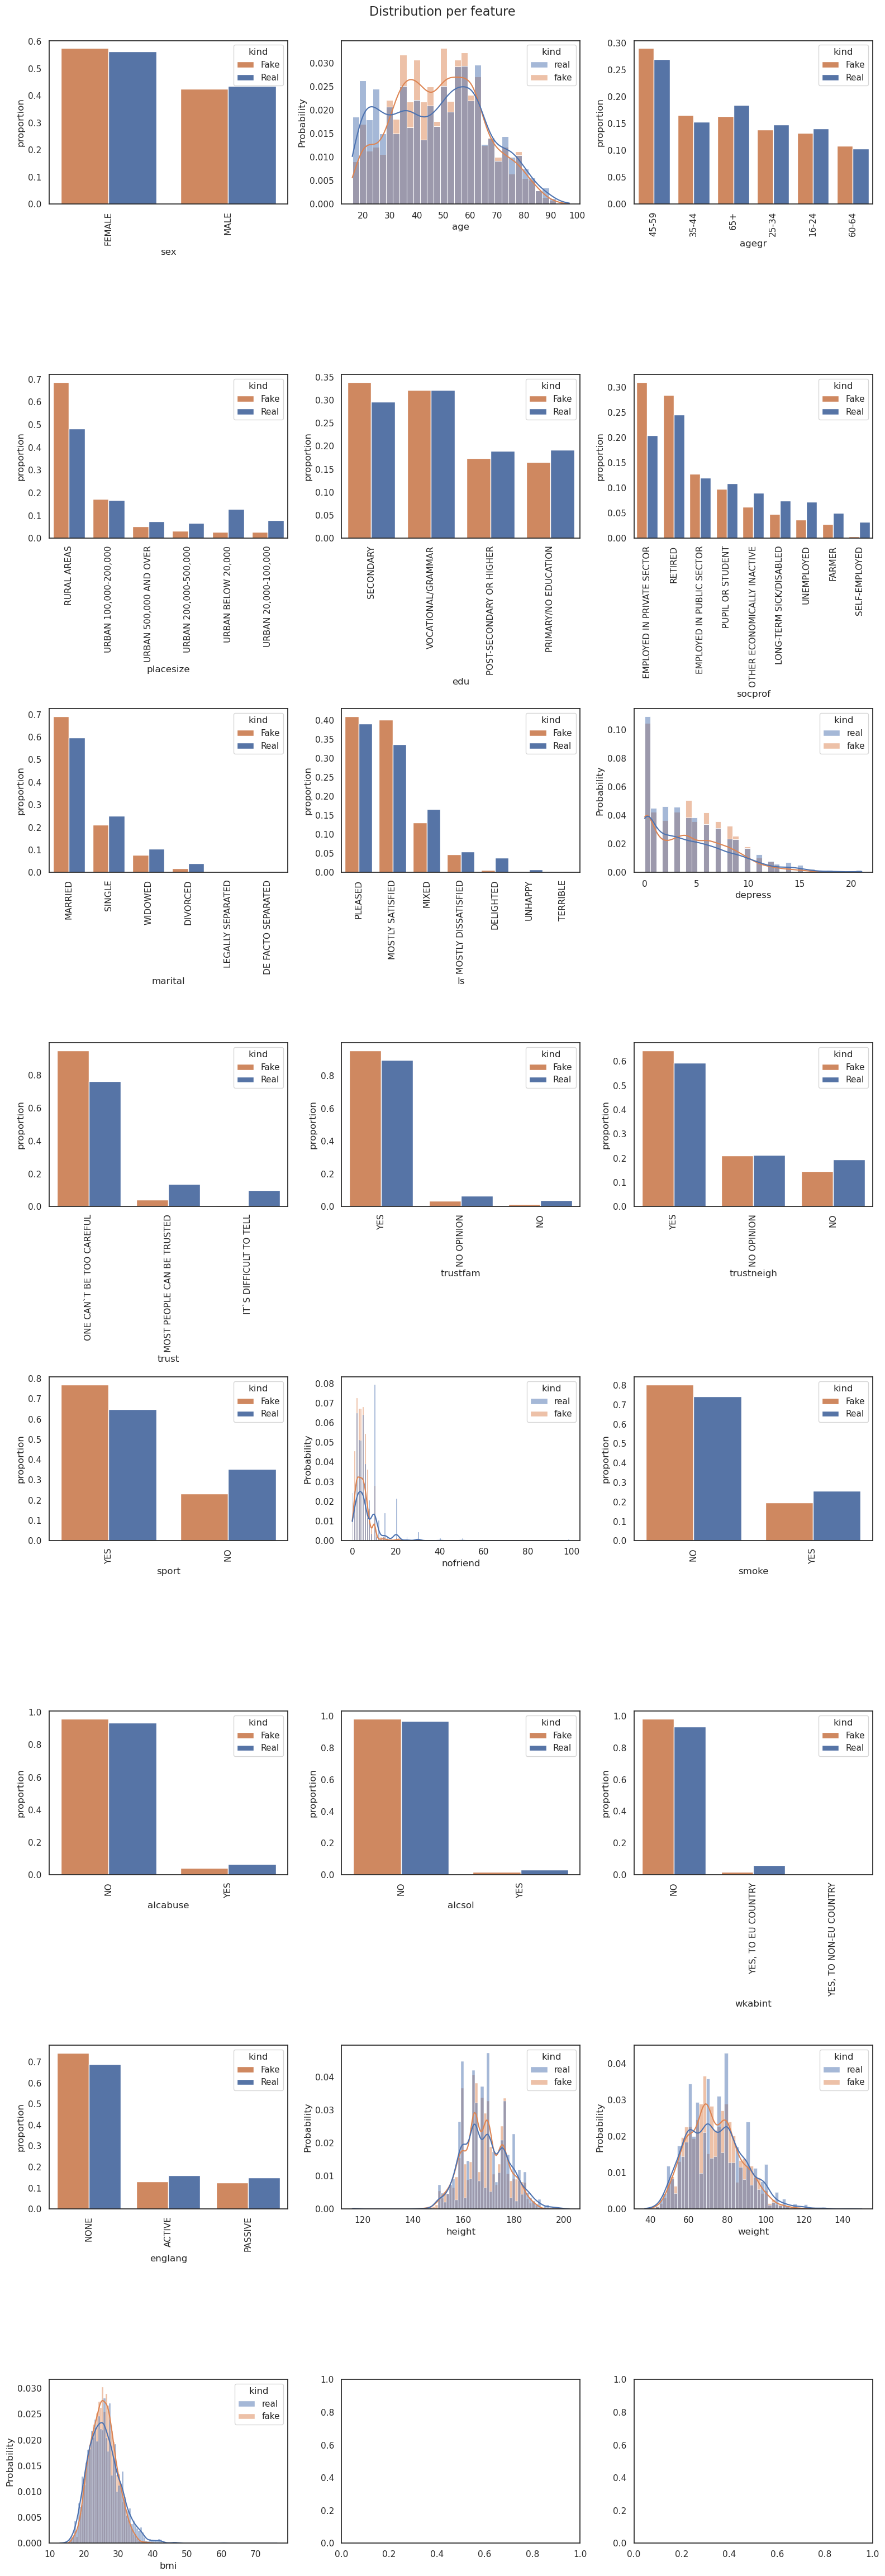

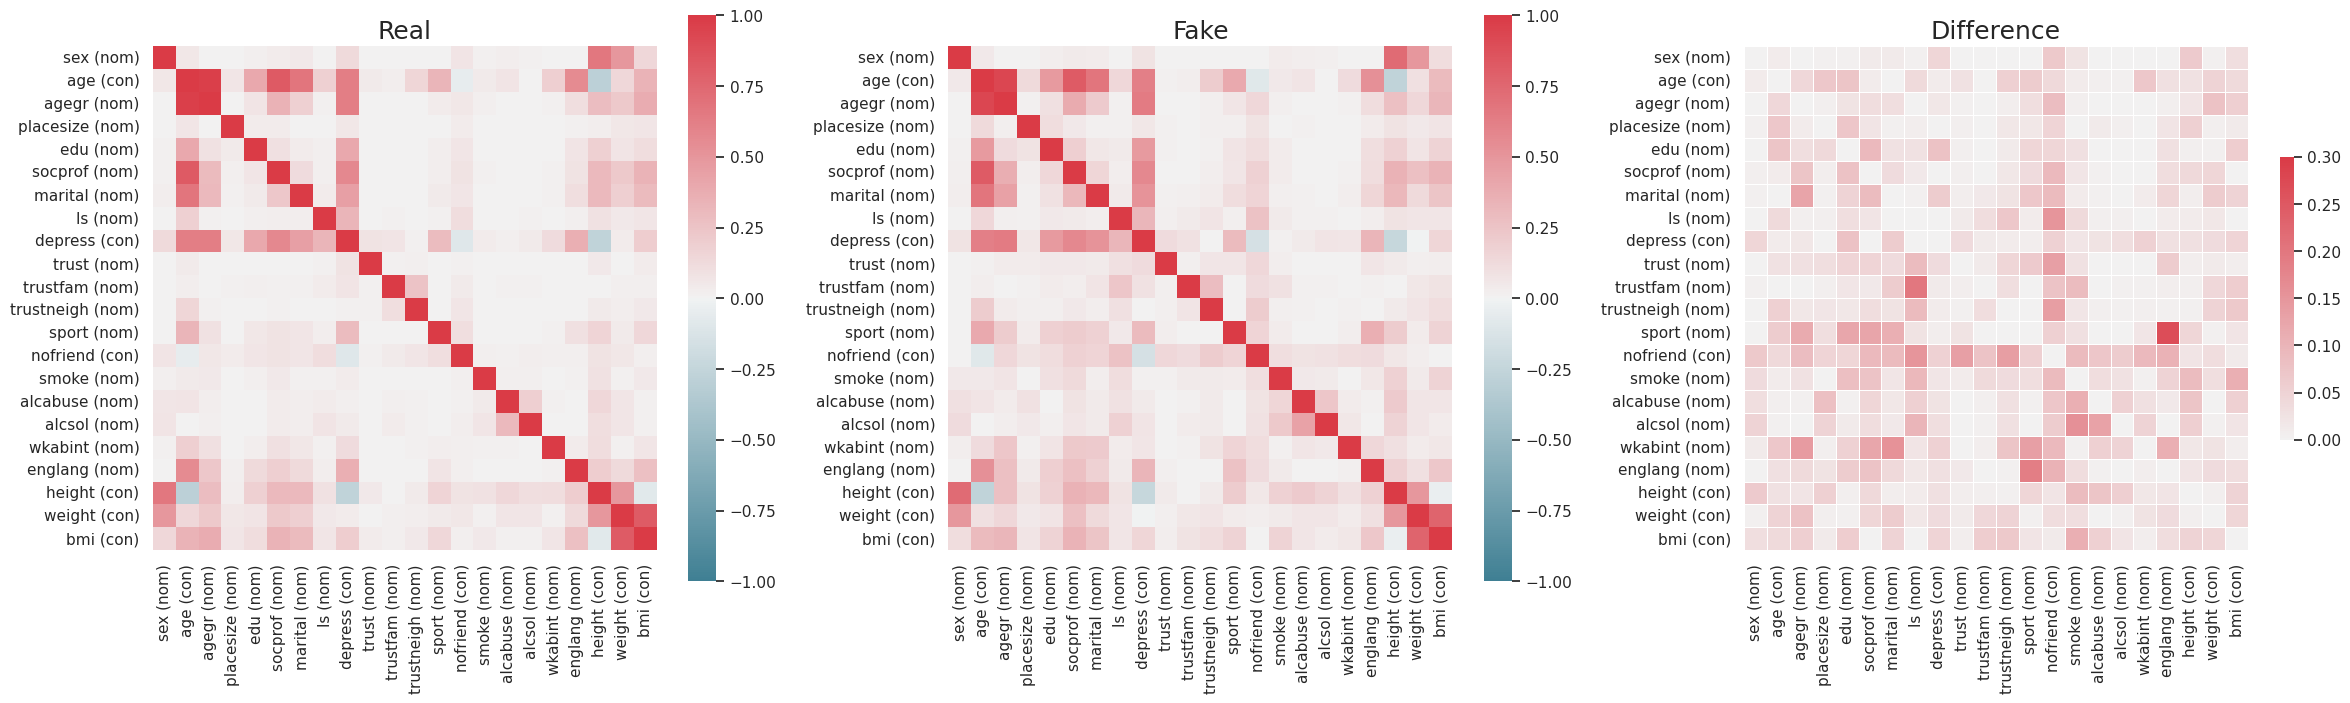

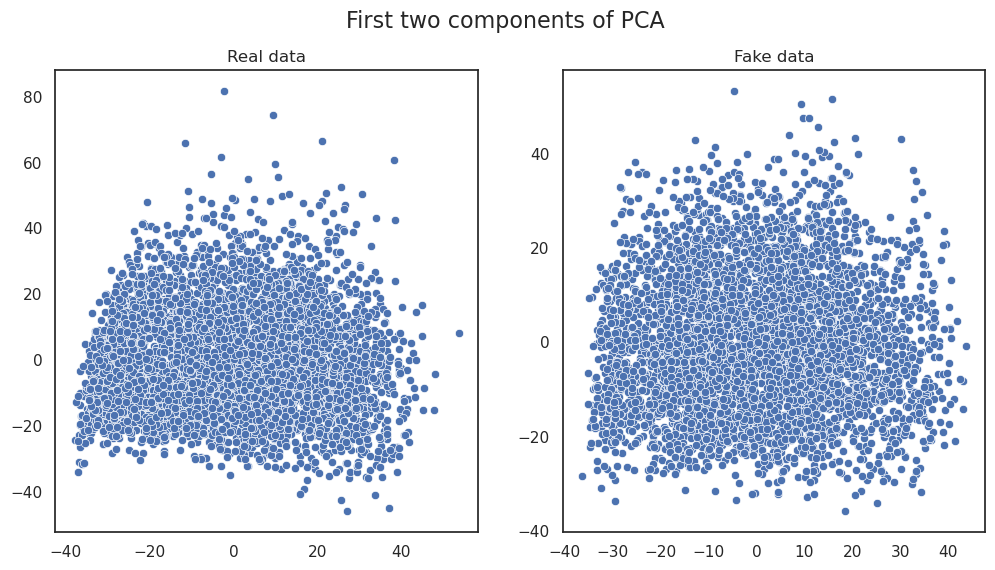

In [63]:
warnings.filterwarnings("ignore")
evaluator_tvae.visual_evaluation()

Les deux premiers graphiques représentent les logarithmes absolu de la moyenne et de l'écart-type de chaque variables numériques.

Matrice corrélations :
- Continue - Continue : utilise le coefficient de corrélation de Pearson $\frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2\sum(y_i -\bar{y})^2}} \in [-1,1]$
- Continue - Catégorielle : utilise le rapport de corrélation $\eta^2(y,x) = \frac{SCE_{inter}}{SCE_{intra}} \in [0,1]$ avec $SCE_{intra} = \sum_j\sum_{i \in J_j}(y_{ij} - \bar{y}_{.j})^2$ qui est la variabilité intra-classe et $SCE_{inter} = \sum_j\sum_{i \in J_j}(\bar{y}_{.j} - \bar{y})^2$ qui est la variabilité inter-classe
- Catégorielle - Catégorielle : utilise le U de Theil, une métrique de corrélation asymétrique pour les associations catégorielles défini par $U(X|Y) = \frac{H(X) - H(X|Y)}{H(X)} \in [0,1]$ avec $H(X) = -\sum_x P_X(x)\log P_X(x)$ et $H(X|Y) = -\sum_{x,y}P_{X,Y}(x,y)\log P_{X|Y}(x|y)$

Cart : 
- Les moyennes et écarts types des variables numériques sont très proches après transformation logarithmique.
- Les corrélations entre variables sont bien reproduites dans les données synthétiques.
- La structure globale des données, telle que capturée par les deux premières composantes principales, est conservée dans les données synthétiques.

Ctree : Pareil

Parametric : 
- On constate une différence dans la variabilité des variables numériques entre les données originales et les données synthétiques.
- On apperçoit également dans la matrice des différences des cases plus foncées indiquant une plus grande différence dans les corrélations
- Les individus ont une représentation différente dans le premier plan factoriel
- Le modèle parametric est globalement moins bon que cart et ctree.

Rf :
- Plus grandes différences dans les effectifs de chaque variables par rapport aux autres modèles
- Il y a une assez grande différence dans les corrélations concernant la variable depress

Bag :
- Quelques différences au niveau des effectifs de cretaines variables

Sample :
- Est assez bon jusqu'à ce qu'on arrive aux corrélations qui sont catastrophiques tout comme la représentation dans le premier plan factoriel 

In [42]:
evaluator.evaluate(target_col = 'sex')

/opt/mamba/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/mamba/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.